In [1]:
# To use these packages, we need to import them first.

import pathlib           # Use the handy Python directory and path library
import math   as m       # The standard Python math library
import numpy  as np      # Numpy array library
import pandas as pd      # Pandas data table and time series library


input_dir = pathlib.Path('InputFolder_Assig')   # Our input files are here.

In [2]:
from scipy.stats import norm      # Import the Normal distribution library

In [3]:
# This is done to get the data from the CSV file.

call_data = pd.read_csv( input_dir / 'CallOptionData_ATM.csv', na_filter = False)
call_data

,TradeID,Rate,Maturity,Strike,Spot,Vol
0,ATM-Binary-Call-Option,0.03,0.5,100,100,0.15


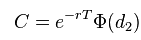

Formula to implement an exotic pricing model

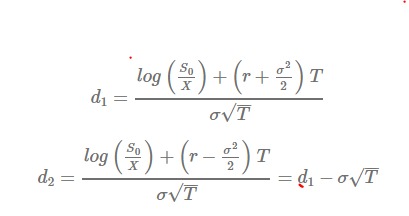

Formulas ( Black scholes to generate d2)

In [4]:
#  At the money (ATM): Spot price (S) = Strike price (x)

#S: underlining stuck price at t=0, aslo known as spot price
#X: strike price 
#t: time to maturity or expiry
#r: risk-free rate
#sigma also known as vol: volatility of underlining stock

S=100
X=100
T=0.5
r=0.03
sigma=0.15


In [5]:
def d2( S, X, T, r, sigma):
        

    d1 = (m.log(S/X)                                   #first we have to calculate d1  from formula above
          +(r+sigma*sigma/2.0)*T)/(sigma*m.sqrt(T))  
    
    d2 = d1 - sigma * m.sqrt(T)                        #from d1 derive d2 parameters
    
    ATM_call_option = np.exp(-r * T) * norm.cdf(d2)    #Implement exotic pricing
    
    return ATM_call_option


In [6]:
x = d2(S, X, T, r, sigma)
print ("ATM_call_option: ", x)

ATM_call_option:  0.5272476608936215


In [7]:
call_data["ATM_call_option"] = x


(call_data)


,TradeID,Rate,Maturity,Strike,Spot,Vol,ATM_call_option
0,ATM-Binary-Call-Option,0.03,0.5,100,100,0.15,0.527248
